A brain tumor is an abnormal growth of cells within or around the brain. These tumors can be either benign (non-cancerous) or malignant (cancerous). Regardless of their type, brain tumors can cause serious health issues due to their location in the brain. As they grow, they may press on or invade surrounding brain tissue, disrupting vital functions such as memory, vision, balance, coordination, and even consciousness. Symptoms can include persistent headaches, seizures, nausea, vision problems, or cognitive changes. If not detected and treated early, brain tumors can lead to permanent brain damage, disability, or death.

Convolutional Neural Networks (CNNs) are a specialized class of deep learning algorithms designed for image recognition and processing tasks. They mimic the way the human brain processes visual data by using multiple layers to automatically detect and learn patterns in images. The key layers in a CNN include convolutional layers (for feature extraction), pooling layers (for dimensionality reduction), and fully connected layers (for classification). CNNs are particularly effective at handling large image datasets and identifying subtle differences or abnormalities in image features — which is why they are widely used in applications such as facial recognition, medical image analysis, and object detection.

CNNs are highly effective tools for analyzing MRI scans to detect the presence of brain tumors. Since MRI images contain complex patterns and structural details of the brain, a CNN can automatically learn to distinguish between healthy and tumor-affected brain tissues by training on labeled examples. The model learns to recognize key features — like shape, intensity, and texture differences — that may not be visible to the human eye. By feeding a new MRI scan into a trained CNN, the system can predict with high accuracy whether a tumor is present, and in some cases, even classify the tumor type. This makes CNN-based models a powerful support tool for early and accurate diagnosis in the field of medical imaging.

In this project, we will train a CNN model to classify brain MRI images as either having a tumor or not. Note that this model will not be able to diagnose the type of tumor present (cancerous/benign or non-cancerous/malignant), it will only classify the presence or absence of a tumor.

In the project folder, there is a folder named 'brain tumor dataset' which contains 2 folders named 'no' and 'yes'. The 'no' folder contains images of healthy brain MRI's while the 'yes' folder contains images of brain MRI's with tumors.

We will first have to split these images into training and testing data. Then we will have to create a Convolutional Neural Network and train it on the training data. Finally, we will test the model on the testing data and evaluate its performance.

So our first step is to split the data into training and testing data.

In [12]:
# import both 'os' and 'shutil' modules for file and folder manipulation
import os
import shutil

from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets

original_dataset_dir = "brain tumor dataset" # define path to 'brain tumor dataset' folder
yes_dir = os.path.join(original_dataset_dir, "yes") # define path to 'yes' folder in 'brain tumor dataset' folder
no_dir = os.path.join(original_dataset_dir, "no") # define path to 'no' folder in 'brain tumor dataset' folder

split_base_dir = "split data" # create a new folder called 'split data' to store the split data
train_yes = os.path.join(split_base_dir, "train/yes") # create a new folder called 'train' inside 'split data' folder and inside it create a new folder called 'yes'
train_no = os.path.join(split_base_dir, "train/no") # create a new folder called 'train' inside 'split data' folder and inside it create a new folder called 'no'
test_yes = os.path.join(split_base_dir, "test/yes") # create a new folder called 'test' inside 'split data' folder and inside it create a new folder called 'yes'
test_no = os.path.join(split_base_dir, "test/no") # create a new folder called 'test' inside 'split data' folder and inside it create a new folder called 'no'

# in the previous 5 steps, we actually defined paths for folder creation, now actually create those folders
for path in [train_yes, train_no, test_yes, test_no]:
    os.makedirs(path, exist_ok = True)

# get names of files 'yes' and 'no'
yes_images = os.listdir(yes_dir)
no_images = os.listdir(no_dir)

# split the images in these folders into training and testing sets
yes_train, yes_test = train_test_split(yes_images, test_size=0.2, random_state=42)
no_train, no_test = train_test_split(no_images, test_size=0.2, random_state=42)

# copy split images into folders which should contains split images

for fname in yes_train:
    shutil.copy(os.path.join(yes_dir, fname), os.path.join(train_yes, fname))
for fname in yes_test:
    shutil.copy(os.path.join(yes_dir, fname), os.path.join(test_yes, fname))

for fname in no_train:
    shutil.copy(os.path.join(no_dir, fname), os.path.join(train_no, fname))
for fname in no_test:
    shutil.copy(os.path.join(no_dir, fname), os.path.join(test_no, fname))

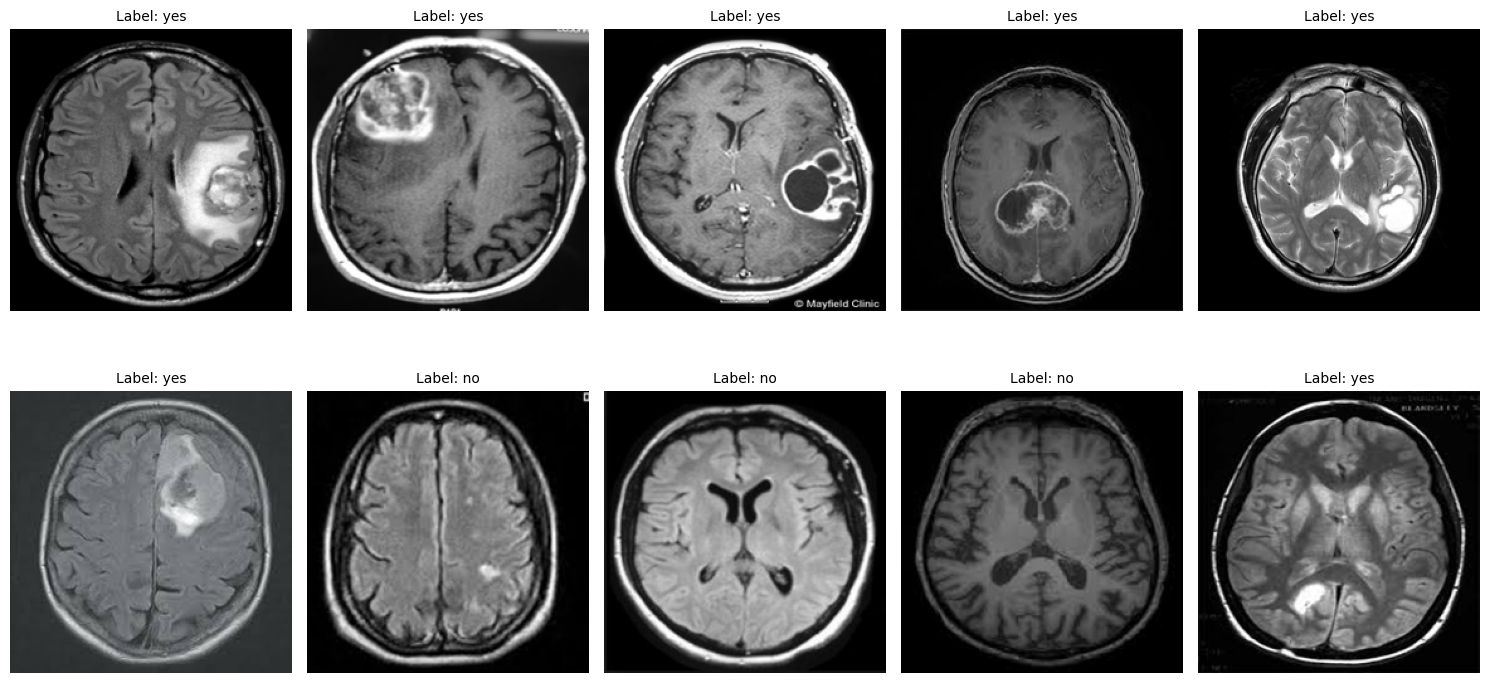

In [14]:
# now let's see some MRI scans

import random # to select random images
import matplotlib.pyplot as plt # for data visualization
from PIL import Image # for image processing
import os # for file access and manipulation

train_data_dir = 'split data/train' # define path to train data

train_paths = [] # to store file paths of training images
train_labels = [] # to store labels of training images ('yes' or 'no')

# Collect image paths and their labels ('yes' or 'no') into the appropriate lists
for label in ['no', 'yes']:
    label_dir = os.path.join(train_data_dir, label)
    for filename in os.listdir(label_dir):
        train_paths.append(os.path.join(label_dir, filename))
        train_labels.append(label)

random_indices = random.sample(range(len(train_paths)), 10) # choose 10 random images from the training set randomly

fig, axes = plt.subplots(2, 5, figsize=(15, 8)) # Create a 2×5 grid of subplots for displaying 10 images in a figure of size 15 x 8 inches
axes = axes.ravel() # lattens the 2D array of axes into a 1D list to simplify indexing in a loop

for i, idx in enumerate(random_indices): # loop through the random indices
    img_path = train_paths[idx] # get the path of image of current index
    img = Image.open(img_path) # open the image at this path
    img = img.resize((224, 224)) # resize the image to 224 x 224 pixels
    axes[i].imshow(img) # display the image in the current subplot
    axes[i].axis('off') # remove axis ticks
    axes[i].set_title(f"Label: {train_labels[idx]}", fontsize=10) # set label of each image ('yes' or 'no') as title of each subplot

plt.tight_layout() # Adjust the spacing between subplots
plt.show() # show the figure


In [10]:
from tensorflow.keras.preprocessing.image import load_img # Keras function to load an image from file

# create a function that takes in an image and returns an augmented image ie image with random brightness and contrast
# applied to it so that the model can generalize the images better

def augment_image(image): # this function takes an image in numpy array format ie (width, height, channels) where channel value is 3 for RGB
    image = Image.fromarray(np.uint8(image)) # converts the numpy array back to a PIL Image after ensuring pixel values are in 0–255 range
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))  # randomly adjusts the image brightness between 80% and 120%
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))  # randomly adjusts the image contrast between 80% and 120%
    image = np.array(image) / 255.0  # converts the enhanced image back to a numpy array and normalizes pixel values to range [0, 1] for stabiliy
    return image # returns the image after augmentation ie with random brightness and contrast in numpy array format

# create a function that takes in a list of image paths and returns 
# a numpy array of images ie a 4D tensor ie (num_images, width, height, channels) where channel value is 3 for RGB

def open_images(paths): # this function takes a list of image paths in string format
    images = [] # initializes an empty list to store the images
    
    for path in paths: # iterates over each path in the list
        IMAGE_SIZE = 224 # set the desired image size for resizing to 224 pixels
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE)) # loads the image and resize it to 224 pixels 
        image = augment_image(image) # apply augmentation to the image
        images.append(image) # add the augmented image to the list
    
    return np.array(images) # return a 4D tensor (number_of_images, width, height, channels) where channel value is 3 for RGB

# create a function to change the labels 'yes' or 'no' to integer value 1 and 0 respectively
# we do this because machine learning models can only work with numerical values

def encode_label(labels): # this function takes a list of labels in string format as input
    unique_labels = os.listdir(train_dir) # get unique values of labels from the directories in a list (the labels received will be 'yes' and 'no')
    encoded = [unique_labels.index(label) for label in labels] # encode the labels as integers 0 and 1 for 'no' and 'yes' respectively
    return np.array(encoded) # return the encoded labels as a numpy array

# create a function to generate batches of images and labels for training and validation to not stress the memory of the computer

def datagen(paths, labels, batch_size = 12, epochs = 1): # this function takes a list of paths, labels, batch size and number of epochs as input
    for _ in range(epochs): # iterates over the number of epochs
        for i in range(0, len(paths), batch_size): # iterate over each batch of images
            batch_paths = paths[i : i + batch_size] # get a list of image paths for the current batch
            batch_images = open_images(batch_paths)  # augment each image in the batch
            batch_labels = labels[i : i + batch_size] # get a list of labels for the current batch
            batch_labels = encode_label(batch_labels)  # encode each label in the batch
            yield batch_images, batch_labels # return the batch of images and labels as a generator so that we call batch when required

In [22]:
# now we will create our model which will be built using VGG16, which is a pre-trained model for image classification

import os  # for directory and file operations
import numpy as np  # for numerical operations and handling image arrays
import random  # for generating random values for augmentation
from PIL import Image, ImageEnhance  # for image processing and enhancement
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # for loading images
from tensorflow.keras.models import Sequential  # for building the model
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense  # for model layers
from tensorflow.keras.optimizers import Adam  # for optimizer
from tensorflow.keras.applications import VGG16  # for using VGG16 model
from sklearn.utils import shuffle  # for shuffling the data

In [44]:
IMAGE_SIZE = 224 # specify the image size in pixels

train_dir = 'split data/train' # specify the directory containing the training data

# create a base VGG16 model having 224x224x3 input shape (3 means RGB channels)
# include_top = False means that we don't want the last in-built layers of the model as we will create them ourselves
# weights = 'imagenet' means that we want to use the weights of the model trained on the ImageNet dataset
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top = False, weights = 'imagenet')

# freeze the layers of the base model to make them non-trainable to prevent them from being updated during training as it can cause overfitting
for layer in base_model.layers:
    layer.trainable = False

# make second, third, and fourth last layers trainable as they have the most important features
for layer in base_model.layers[-4:-1]: layer.trainable = True

# now we have to create a model

model = Sequential() # initialize an empty sequential model
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))) # 
model.add(base_model) # add the base model to the sequential model
model.add(Flatten())  # flatten the multidimensional output of the base model into one dimensional vector
# so that it can be passed to the next layers properly
model.add(Dropout(0.3)) # add a dropout layer that deactivates 30% of the neurons randomly to prevent overfitting
model.add(Dense(128, activation='relu')) # add a dense layer with 128 neurons and ReLU activation function
model.add(Dropout(0.2)) # add another dropout layer that deactivates 20% of the neurons randomly to prevent overfitting
model.add(Dense(len(os.listdir(train_dir)), activation='softmax')) # create an output layer with the number of neurons equal to 
# the number of classes in the training dataset which are 'yes' and 'no', 'softmax' activation function is used to convert the output
# of the last layer into a probability distribution in range [0,1]

# compile the model with Adam optimizer, sparse categorical crossentropy loss function, and sparse categorical accuracy metric
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

batch_size = 20 # define the batch size for training
steps = int(len(train_paths) / batch_size) # calculate the number of steps per epoch based on the batch size and the number of training samples
# this will tell after how many batches the model weights will be updated
epochs = 5 # define the number of epochs for training

# train the model using the datagen function with the specified batch size and epochs
history = model.fit(datagen(train_paths, train_labels, batch_size = batch_size, epochs = epochs), epochs = epochs, steps_per_epoch = steps)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - loss: 2.3228 - sparse_categorical_accuracy: 0.5745
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - loss: 0.9492 - sparse_categorical_accuracy: 0.3263
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - loss: 0.8173 - sparse_categorical_accuracy: 0.5323
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - loss: 0.6264 - sparse_categorical_accuracy: 0.6460
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - loss: 0.5825 - sparse_categorical_accuracy: 0.7584


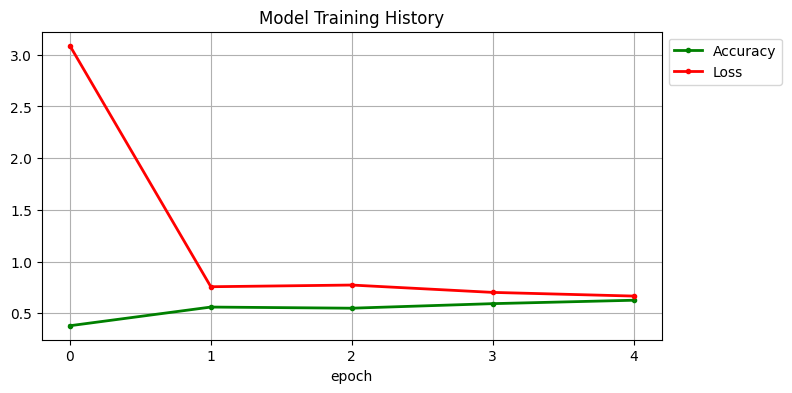

In [12]:
# let's create a graph showing the training and validation loss and accuracy at each epoch
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [16]:
# we can also get a classification report and confusion matrix for our model
# everything is same as how we collected data for training, except now we are taking test data

from sklearn.metrics import classification_report, confusion_matrix

test_dir = 'split data/test'

test_paths = []
test_labels = []

for label in ['no', 'yes']:
    label_dir = os.path.join(test_dir, label)
    
    for filename in os.listdir(label_dir):
        test_paths.append(os.path.join(label_dir, filename))
        test_labels.append(label)

test_images = open_images(test_paths) # augment the test images

test_labels_encoded = encode_label(test_labels) # encode the test labels

test_predictions = model.predict(test_images) # predict the test labels using the model trained

# print the classification report
print("Classification Report:")
print(classification_report(test_labels_encoded, np.argmax(test_predictions, axis=1)))

conf_matrix = confusion_matrix(test_labels_encoded, np.argmax(test_predictions, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.61      1.00      0.76        31

    accuracy                           0.61        51
   macro avg       0.30      0.50      0.38        51
weighted avg       0.37      0.61      0.46        51

Confusion Matrix:
[[ 0 20]
 [ 0 31]]


c:\Users\nishc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nishc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nishc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [17]:
model.save('model.h5') # save the model

In [33]:
# Now that we have created a model and saved it, it's time to write a function that will 
# look at an MRI scan of a human brain and predict whether the brain contains a tumor or not.

def detect_and_display(img_path, image_size = 224):
    try:
        class_labels = ['no', 'yes']
        
        # Load and preprocess the image
        img = load_img(img_path, target_size=(image_size, image_size))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make a prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        confidence_score = np.max(predictions, axis=1)[0]

        # Determine the class
        if class_labels[predicted_class_index] == 'no':
            result = "No Tumor"
        else:
            result = f"Tumor: {class_labels[predicted_class_index]}"

        # Display the image with the prediction
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("Error processing the image:", str(e))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


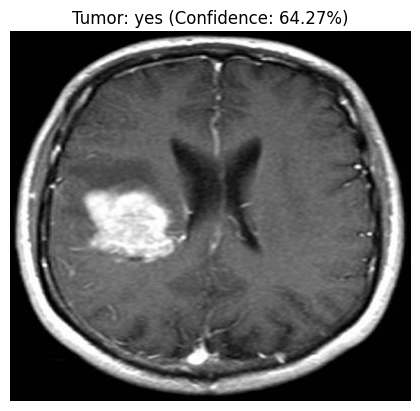

In [34]:
# testing the function for some input images

image_path = 'split data/test/yes/Y11.jpg'
detect_and_display(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


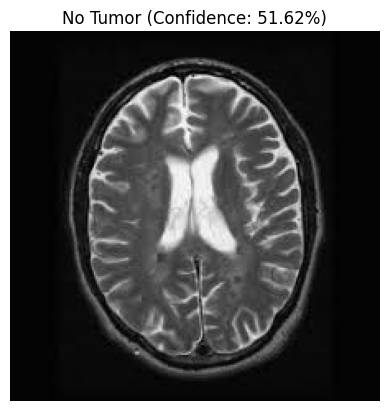

In [49]:
image_path = 'split data/test/no/21 no.jpg'
detect_and_display(image_path)